# Extracting features

In [1]:
# imports
from PIL import Image
import numpy as np

import sys
sys.path.insert(0,'..') 
from calcfeatures.individualFeatures import IndividualFeatures
from calcfeatures.regionFeatures import RegionFeatures

In [2]:
image_path = 'sample/image-roi.png'
mask_path = 'sample/mask-roi.png'

image


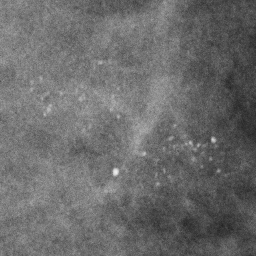

mask


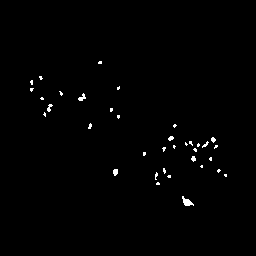

In [3]:
# load images
img = Image.open(image_path)
mask = Image.open(mask_path)
img_arr = np.array(img) # this is int32
img_arr = (img_arr/(2**16-1)*(2**8-1)).astype(np.uint8)
mask_arr = np.array(mask)

print('image')
display(img)
print('mask')
display(mask)

# Extracting individual features

In [4]:
# all features and statistical aggregation
feature_extractor = IndividualFeatures(mask_arr>0,img_arr)
feature_dict = feature_extractor.execute()
feature_dict

{'area_min': 7,
 'area_max': 62,
 'area_mean': 14.555555555555555,
 'area_median': 11.0,
 'area_std': 10.204885229128378,
 'area_skew': 3.280144716050053,
 'area_kurtosis': 13.195534167317549,
 'convex_area_min': 7,
 'convex_area_max': 71,
 'convex_area_mean': 15.694444444444445,
 'convex_area_median': 11.0,
 'convex_area_std': 12.037606417139923,
 'convex_area_skew': 3.2391124886941345,
 'convex_area_kurtosis': 12.660637194703892,
 'eccentricity_min': 0.377964473009227,
 'eccentricity_max': 0.9517276082424098,
 'eccentricity_mean': 0.741575755418901,
 'eccentricity_median': 0.7407068605102689,
 'eccentricity_std': 0.12654405915212016,
 'eccentricity_skew': -0.48189959431643586,
 'eccentricity_kurtosis': 0.3580346938602057,
 'major_axis_length_min': 3.0237157840738176,
 'major_axis_length_max': 13.318347297323845,
 'major_axis_length_mean': 5.4383555708543065,
 'major_axis_length_median': 4.572075433821304,
 'major_axis_length_std': 2.1644386067237362,
 'major_axis_length_skew': 1.9370

In [5]:
# filtering feature classes
feature_extractor = IndividualFeatures(mask_arr>0,img_arr, feature_classes=['size'])
feature_dict = feature_extractor.execute()
feature_dict

{'area_min': 7,
 'area_max': 62,
 'area_mean': 14.555555555555555,
 'area_median': 11.0,
 'area_std': 10.204885229128378,
 'area_skew': 3.280144716050053,
 'area_kurtosis': 13.195534167317549,
 'convex_area_min': 7,
 'convex_area_max': 71,
 'convex_area_mean': 15.694444444444445,
 'convex_area_median': 11.0,
 'convex_area_std': 12.037606417139923,
 'convex_area_skew': 3.2391124886941345,
 'convex_area_kurtosis': 12.660637194703892,
 'major_axis_length_min': 3.0237157840738176,
 'major_axis_length_max': 13.318347297323845,
 'major_axis_length_mean': 5.4383555708543065,
 'major_axis_length_median': 4.572075433821304,
 'major_axis_length_std': 2.1644386067237362,
 'major_axis_length_skew': 1.9370524319360949,
 'major_axis_length_kurtosis': 4.14745152385388,
 'minor_axis_length_min': 2.2131333406899523,
 'minor_axis_length_max': 6.805104734680326,
 'minor_axis_length_mean': 3.3025541822495827,
 'minor_axis_length_median': 3.039407312794009,
 'minor_axis_length_std': 0.9633519345576386,
 'm

In [6]:
# no aggregation, all features per calcification
feature_extractor = IndividualFeatures(mask_arr>0,img_arr, aggregate=False)
feature_dict = feature_extractor.execute()
feature_dict

[{'area': 11,
  'convex_area': 11,
  'major_axis_length': 4.346129984141888,
  'minor_axis_length': 3.067356324605907,
  'eccentricity': 0.7084437526351621,
  'solidity': 1.0,
  'moment_hu_0': 0.16078136739293766,
  'moment_hu_1': 0.002901396000476417,
  'moment_hu_2': 0.00030367085865943427,
  'moment_hu_3': 8.091782558547087e-06,
  'moment_hu_4': 2.5117692678829584e-10,
  'moment_hu_5': 3.4054242178266554e-07,
  'moment_hu_6': -3.127341127503004e-10},
 {'area': 11,
  'convex_area': 12,
  'major_axis_length': 4.610834905547121,
  'minor_axis_length': 3.0688576741519786,
  'eccentricity': 0.7463307334734736,
  'solidity': 0.9166666666666666,
  'moment_hu_0': 0.17430503380916607,
  'moment_hu_1': 0.004527080919031295,
  'moment_hu_2': 0.00021195126673401656,
  'moment_hu_3': 3.7023722083918005e-06,
  'moment_hu_4': -2.7762376182359415e-11,
  'moment_hu_5': -2.0497010693998677e-07,
  'moment_hu_6': 9.992937964234387e-11},
 {'area': 12,
  'convex_area': 12,
  'major_axis_length': 5.294328

# Extracting region features

In [7]:
feature_extractor = RegionFeatures(mask_arr>0,img_arr)

In [8]:
feature_extractor.get_shape_features()
feature_extractor.get_size_features()
feature_extractor.get_greylevel_features()

In [9]:
feature_extractor.features

{'eccentricity': 0.9369691091474568,
 'inertia_1': 4379.894558178906,
 'inertia_2': 534.7364583702458,
 'orientation': 1.0816165176201251,
 'solidity': 0.9886348876477464,
 'moment_hu_0': 9.37906682547548,
 'moment_hu_1': 53.847535154289304,
 'moment_hu_2': 266.7041790424606,
 'moment_hu_3': 177.91465442501124,
 'moment_hu_4': 38735.54690092238,
 'moment_hu_5': 1305.2422517698901,
 'moment_hu_6': -1241.0862111591364,
 'area': 524,
 'convex_area': 15223,
 'major_axis_length': 264.72308726452724,
 'minor_axis_length': 92.49747744627382,
 'n_objects': 36,
 'contrast0': 208.28271289840637,
 'dissimilarity0': 11.080832918326694,
 'homogeneity0': 0.08865149450312401,
 'ASM0': 0.00028793410769273494,
 'energy0': 0.016968621266700925,
 'correlation0': 0.8205590226083023}